# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#dg">Data Gathering</a></li>
<li><a href="#ad">Assessing Data</a></li>
<li><a href="#cd">Cleaning Data</a></li>
<li><a href="#sd">Storing Data</a></li>
<li><a href="#av">Analyzing and Visualizing Data</a></li>
</ul>

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import requests
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
import seaborn as sns
from timeit import default_timer as timer
from bs4 import BeautifulSoup
%matplotlib inline

<a id='df'></a>
## Data Gathering

### Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
>#### This file was downloaded from Udacity and loaded using pandas.

In [2]:
# Load file
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

# View some of the contents
tw_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Using the Requests library to download the tweet image prediction (image_predictions.tsv)
>#### This is downloaded using the request library and provided link.

In [3]:
# Download from the image predictions URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(r.content)
tw_pred = pd.read_csv('image-predictions.tsv', sep='\t')

# View some of the contents
tw_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
>#### The cell below is set not run. This is the twitter API information. File is already provided.

In [4]:
%%script False
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tw_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Couldn't find program: 'False'


### Load the Twitter API data from the provided tweet_json.txt
>#### The provided file is used to load the tweet_json.txt data.

In [5]:
# Create list to hold json data
tw_json = []

# Read each line of the json and append into the list created
with open('tweet_json.txt') as file:
    for line in file:
        tw_json.append(json.loads(line))

In [6]:
tw_json[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [7]:
# Extract the relevant fields from each tweet and store them in a list of dictionaries
tweets = []
for tweet in tw_json:
    tweets.append({
        "tweet_id": tweet["id_str"],
        "retweet_count": tweet["retweet_count"],
        "favorite_count": tweet["favorite_count"],
        "hashtags": [tag["text"] for tag in tweet["entities"]["hashtags"]],
    })

# Create a DataFrame from the list of dictionaries
tw_api_data = pd.DataFrame(tweets)

# View some of the contents
tw_api_data.head(2)

,tweet_id,retweet_count,favorite_count,hashtags
0,892420643555336193,8853,39467,[]
1,892177421306343426,6514,33819,[]


<a id='ad'></a>
## Assessing Data

### Programmatically accessing all three datasets. 

In [8]:
# View tw_archive info
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# View tw_pred info
tw_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
# View tw_api_data info
tw_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   hashtags        2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


In [11]:
# View the first 5 rows of tw_archive
tw_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# View the first 5 rows of tw_pred
tw_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
# View the first 5 rows of tw_api_data
tw_api_data.head(5)

,tweet_id,retweet_count,favorite_count,hashtags
0,892420643555336193,8853,39467,[]
1,892177421306343426,6514,33819,[]
2,891815181378084864,4328,25461,[]
3,891689557279858688,8964,42908,[]
4,891327558926688256,9774,41048,[BarkWeek]


In [14]:
# View the number of unique values for each column in tw_archive
tw_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [15]:
# View the number of unique values for each column in tw_pred
tw_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [16]:
# View a description of the data in tw_api_data
tw_api_data.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Quality issues
1. tw_archive dataset: The 'timestamp' column is in string format instead of datetime format.

2. tw_archive dataset: There are retweets in the dataset that are not needed.

3. tw_archive dataset: The 'name' column has invalid names (e.g., 'a', 'such', 'the', 'just', 'getting', etc.).

4. tw_pred dataset: 4.	Dog breeds in columns 'p1', 'p2', and 'p3' are not capitalized consistently.

5. tw_archive dataset: The 'source' column contains HTML tags that need to be removed for easier reading.

6. tw_pred dataset: The 'tweet_id' column is not in a consistent format across all datasets.

7. tw_pred dataset: There are some jpg_url values duplicated, which could indicate that some images were tweeted multiple times.

8. tw_pred dataset: Columns 'p1_conf', 'p2_conf', and 'p3_conf' contain extended decimal confidence levels which can be difficult to interpret.

### Tidiness issues
1. tw_archive dataset: The 'doggo', 'floofer', 'pupper', and 'puppo' columns represent the same variable and should be combined into a single 'stage' column.

2. tw_archive dataset: Columns ‘retweeted_status_id’, ‘retweeted_status_user_id’, and ‘retweeted_status_timestamp’ should be dropped since they are empty after removing the retweets..

<a id='cd'></a>
## Cleaning Data

In [17]:
# Make copies of original pieces of data
tw_archive_2 = tw_archive.copy()
tw_api_data_2 = tw_api_data.copy()
tw_pred_2 = tw_pred.copy()

### Quality Issues

### Issue #1:

#### Define: The 'timestamp' column in 'tw_archive_2' is in string format instead of datetime format.

In [18]:
# View column type information before correcting.
tw_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Code

In [19]:
# Convert the timestamp column to datetime format
tw_archive_2['timestamp'] = pd.to_datetime(tw_archive_2['timestamp'])

#### Test

In [20]:
# View column type information after correcting.
tw_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:

#### Define: The dataset contains retweets that are not needed.

In [21]:
#Get shape before correcting.
print(tw_archive_2.shape)

(2356, 17)


#### Code

In [22]:
# Filter out rows where the retweeted_status_id column is not NaN
tw_archive_2 = tw_archive_2[tw_archive_2['retweeted_status_id'].isna()]

#### Test

In [23]:
#Get shape after correcting.
print(tw_archive_2.shape)

(2175, 17)


### Issue #3:

#### Define: The 'name' column has invalid names (e.g. 'a', 'such', 'the', 'just', 'getting', etc.).

In [24]:
# View column type information before correcting.
tw_archive_2['name'].value_counts()

None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

#### Code

In [25]:
# Create a mask with .str.islower() to check which names are lowercase
mask = tw_archive_2.name.str.islower()

# Store the column name in a variable for clarity
column_name = 'name'

# Select only the rows where the mask is True and replace the name for those rows with NaN
tw_archive_2.loc[mask, column_name] = np.nan

#### Test

In [26]:
# View column type information after correcting.
print(tw_archive_2['name'].value_counts())

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64


### Issue #4:

#### Define: 4.	Dog breeds in columns 'p1', 'p2', and 'p3' are not capitalized consistently.

In [27]:
# Get counts of unique dog breeds in p1 column
print(tw_pred_2['p1'].value_counts())

# Get counts of unique dog breeds in p2 column
print(tw_pred_2['p2'].value_counts())

# Get counts of unique dog breeds in p3 column
print(tw_pred_2['p3'].value_counts())

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64


#### Code

In [28]:
# Convert predicted dog breed names to lowercase in p1 column
tw_pred_2['p1'] = tw_pred['p1'].str.lower()

# Convert predicted dog breed names to lowercase in p2 column
tw_pred_2['p2'] = tw_pred['p2'].str.lower()

# Convert predicted dog breed names to lowercase in p3 column
tw_pred_2['p3'] = tw_pred['p3'].str.lower()

#### Test

In [29]:
# Get counts of unique dog breeds in p1 column
print(tw_pred_2['p1'].value_counts())

# Get counts of unique dog breeds in p2 column
print(tw_pred_2['p2'].value_counts())

# Get counts of unique dog breeds in p3 column
print(tw_pred_2['p3'].value_counts())

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64
labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
                     ... 
horse_cart              1
tray                    1
pier                    1
red_fox                 1
bagel                   1
Name: p2, Length: 404, dtype: int64
labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64


### Issue #5:

#### Define:  In the twitter archive, the 'source' column contains HTML tags that need to be removed for easier reading

In [30]:
# View the unique values in the source column before cleaning
print(tw_archive_2['source'].unique())

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']


#### Code

In [31]:
# Clean the source column by removing HTML tags
tw_archive_2['source'] = tw_archive_2['source'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

#### Test

In [32]:
# View the unique values in the source column after cleaning
print(tw_archive_2['source'].unique())

['Twitter for iPhone' 'Twitter Web Client' 'Vine - Make a Scene'
 'TweetDeck']


### Issue #6:

#### Define:  6.	The 'tweet_id' column is not in a consistent format across all datasets.

In [33]:
# View the data type of the tweet_id column before converting type.
print(tw_pred_2['tweet_id'].dtype)
print(tw_api_data_2['tweet_id'].dtype)
print(tw_archive_2['tweet_id'].dtype)

int64
object
int64


#### Code

In [34]:
# Convert the tweet_id column to string format
tw_pred_2['tweet_id'] = tw_pred_2['tweet_id'].astype(str)
tw_archive_2['tweet_id'] = tw_pred_2['tweet_id'].astype(str)

#### Test

In [35]:
# View the data type of the tweet_id column before converting type.
print(tw_pred_2['tweet_id'].dtype)
print(tw_api_data_2['tweet_id'].dtype)
print(tw_archive_2['tweet_id'].dtype)

object
object
object


### Issue #7:

#### Define:   In the tweet image predictions there are some duplicated jpg_url values, which could indicate that some images were tweeted multiple times.

In [36]:
#View the number of duplicated jpg_url values
print(tw_pred_2['jpg_url'].duplicated().sum())

66


#### Code

In [37]:
#Remove the duplicated jpg_url values
tw_pred_2.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [38]:
#View the number of duplicated jpg_url values after removing them
print(tw_pred_2['jpg_url'].duplicated().sum())

0


### Issue #8:

#### Define:  Columns 'p1_conf',' p2_conf', and 'p3_conf' contained extended decimal confidence levels which can be difficult to interpret.

In [39]:
# View the summary statistics of the p1_conf column
tw_pred_2['p1_conf'].head()

# View the summary statistics of the p2_conf column
tw_pred_2['p2_conf'].head()

# View the summary statistics of the p3_conf column
tw_pred_2['p3_conf'].head()

0    0.061428
1    0.072010
2    0.116197
3    0.222752
4    0.154629
Name: p3_conf, dtype: float64

#### Code

In [40]:
# Round the confidence levels to two decimal places
tw_pred_2['p1_conf'] = tw_pred_2['p1_conf'].round(2)
tw_pred_2['p2_conf'] = tw_pred_2['p2_conf'].round(2)
tw_pred_2['p3_conf'] = tw_pred_2['p3_conf'].round(2)

#### Test

In [41]:
# View the summary statistics of the p1_conf column
tw_pred_2['p1_conf'].head()

# View the summary statistics of the p2_conf column
tw_pred_2['p2_conf'].head()

# View the summary statistics of the p3_conf column
tw_pred_2['p3_conf'].head()

0    0.06
1    0.07
2    0.12
3    0.22
4    0.15
Name: p3_conf, dtype: float64

### Tidiness issues

### Issue # 1:

#### Define: The 'doggo', 'floofer', 'pupper', and 'puppo' columns represent the same variable and should be combined into a single 'stage' column.

In [42]:
# View the columns
tw_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1896 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### Code

In [43]:
# Define a function to combine the doggo, floofer, pupper, and puppo columns into a single stage column
def combine_stages(row):
    stages = []
    if row['doggo'] != 'None':
        stages.append(row['doggo'])
    if row['floofer'] != 'None':
        stages.append(row['floofer'])
    if row['pupper'] != 'None':
        stages.append(row['pupper'])
    if row['puppo'] != 'None':
        stages.append(row['puppo'])
    if len(stages) == 0:
        return 'None'
    else:
        return '-'.join(stages)

# Apply the combine_stages function to create a new stage column
tw_archive_2['stage'] = tw_archive_2.apply(lambda row: combine_stages(row), axis=1)

# Drop the original doggo, floofer, pupper, and puppo columns
tw_archive_2 = tw_archive_2.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [44]:
# View the columns
tw_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1896 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Issue # 2:

#### Define: 2.	Columns ‘retweeted_status_id’, ‘retweeted_status_user_id’, and ‘retweeted_status_timestamp’ should be dropped

In [45]:
# View the columns
tw_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1896 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### Code

In [46]:
# Drop the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns
tw_archive_2 = tw_archive_2.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [47]:
# View the columns
tw_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1896 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2071 non-null   object             
 10  stage                  2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(

<a id='sd'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
# Merge the cleaned datasets into a master database
tw_master = pd.merge(tw_archive_2, tw_api_data_2, on='tweet_id', how='left')
tw_master = pd.merge(tw_master, tw_pred_2, on='tweet_id', how='left')

# Save the twitter_archive_master DataFrame as a CSV file
tw_master.to_csv('twitter_archive_master.csv', index=False)

In [49]:
# Read the saved CSV file back into a DataFrame
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,6.660209e+17,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,welsh_springer_spaniel,0.47,True,collie,0.16,True,shetland_sheepdog,0.06,True
1,6.660293e+17,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,redbone,0.51,True,miniature_pinscher,0.07,True,rhodesian_ridgeback,0.07,True
2,6.660334e+17,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,german_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,6.660442e+17,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,6.660492e+17,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,1.0,miniature_pinscher,0.56,True,rottweiler,0.24,True,doberman,0.15,True


<a id='av'></a>
## Analyzing and Visualizing Data

### Insight and Visualization 1:
>The top stage that was favorited, with total of 2367794, was pupper.

stage
pupper           2367794.0
doggo             263545.0
puppo              76681.0
doggo-pupper       65670.0
floofer            45761.0
doggo-floofer        712.0
doggo-puppo          413.0
Name: favorite_count, dtype: float64


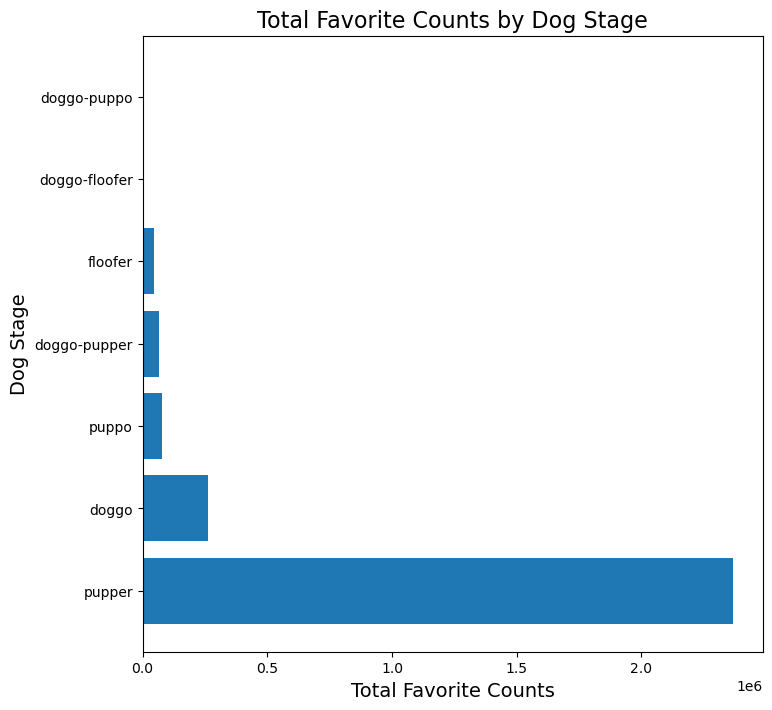

In [50]:
# Filter out rows where the stage column is null
tw_master = twitter_archive_master[twitter_archive_master['stage'] != "None"]

# Group the data by stage and calculate the total favorite counts
favorite_counts_by_stage = tw_master.groupby('stage')['favorite_count'].sum().sort_values(ascending=False)

# View total favorite counts
print(favorite_counts_by_stage.head(7))

# Create the bar chart
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(y=favorite_counts_by_stage.index, width=favorite_counts_by_stage.values)
ax.set_xlabel('Total Favorite Counts', fontsize=14)
ax.set_ylabel('Dog Stage', fontsize=14)
ax.set_title('Total Favorite Counts by Dog Stage', fontsize=16)
plt.show()

In [51]:
# Image of a pupper so you can see why it is the favorite stage.
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg')

### Insight and Visualization 2:
>The top source for posting was Twitter for iPhone with 2042 post.

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64


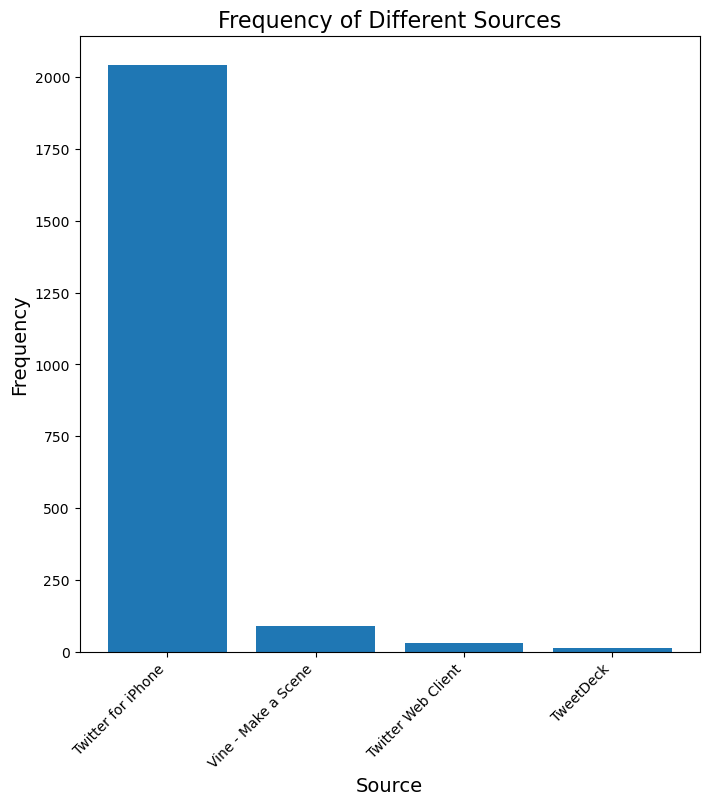

In [52]:
# Get the value counts of the "source" column
source_counts = twitter_archive_master['source'].value_counts()

# View total post counts by source
print(source_counts.head(4))

# Create a bar chart
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x=source_counts.index, height=source_counts.values)
ax.set_xticks(range(len(source_counts)))
ax.set_xticklabels(source_counts.index, rotation=45, ha='right')
ax.set_xlabel('Source', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Frequency of Different Sources', fontsize=16)
plt.show()

### Insight and Visualization 3:
>The scatter plot shows a positive correlation between favorite count and retweet count. As favorite count increases, retweet count also tends to increase. This means that the more a tweet is favorited it also tend to get more retweets. However, correlation does not prove causation. Other factors besides just favorite and retweet counts could contribute to a tweet's popularity.

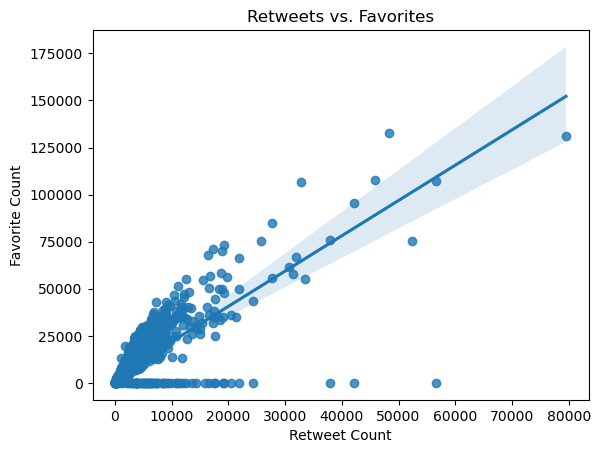

In [53]:
# Create a scatter plot with trend line of retweet_count vs. favorite_count
sns.regplot(x=twitter_archive_master['retweet_count'],
y=twitter_archive_master['favorite_count'])
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Retweets vs. Favorites')
plt.show()

>To confirm the above I will find the correlation coefficient.

In [54]:
# Calculate the correlation between favorite_count and retweet_count
correlation = twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])
print(f'Correlation between favorite count and retweet count: {correlation}')

Correlation between favorite count and retweet count: 0.7857234715895786
